In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [151]:
df = pd.read_csv('data/churn_train.csv')

In [152]:
df['rated_by_driver'] = ~pd.isnull(df['avg_rating_by_driver'])
df['avg_rating_by_driver'].fillna(-10, inplace=True)
# Rating of drivers
df['rated_driver'] = ~pd.isnull(df['avg_rating_of_driver'])
df['avg_rating_of_driver'].fillna(-10, inplace=True)
# Phone
df['phone'].fillna('iPhone', inplace=True)

In [153]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['days_since_last_trip'] = (dt.datetime.strptime('2014-07-01', "%Y-%m-%d") - df['last_trip_date']).dt.days
df.loc[df['days_since_last_trip'] > 30,'churned'] = True
df.loc[df['days_since_last_trip'] <= 30,'churned'] = False
df = pd.get_dummies(df, columns=['city', 'phone'])

In [154]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'last_trip_date', u'signup_date', u'surge_pct',
       u'trips_in_first_30_days', u'luxury_car_user', u'weekday_pct',
       u'rated_by_driver', u'rated_driver', u'days_since_last_trip',
       u'churned', u'city_Astapor', u'city_King's Landing', u'city_Winterfell',
       u'phone_Android', u'phone_iPhone'],
      dtype='object')

In [135]:
df['days_since_last_trip'] = (dt.datetime.strptime('2014-07-01', "%Y-%m-%d") - df['last_trip_date']).dt.days

In [136]:
df.loc[df['days_since_last_trip'] > 30,'churned'] = True
df.loc[df['days_since_last_trip'] <= 30,'churned'] = False

In [137]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,days_since_last_trip,churned
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,59,True
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,156,True
2,21.50,4.0,-10.0,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,41,True
3,9.46,5.0,-10.0,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,172,True
4,13.77,5.0,-10.0,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,49,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1141e1ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e3d55d0>]], dtype=object)

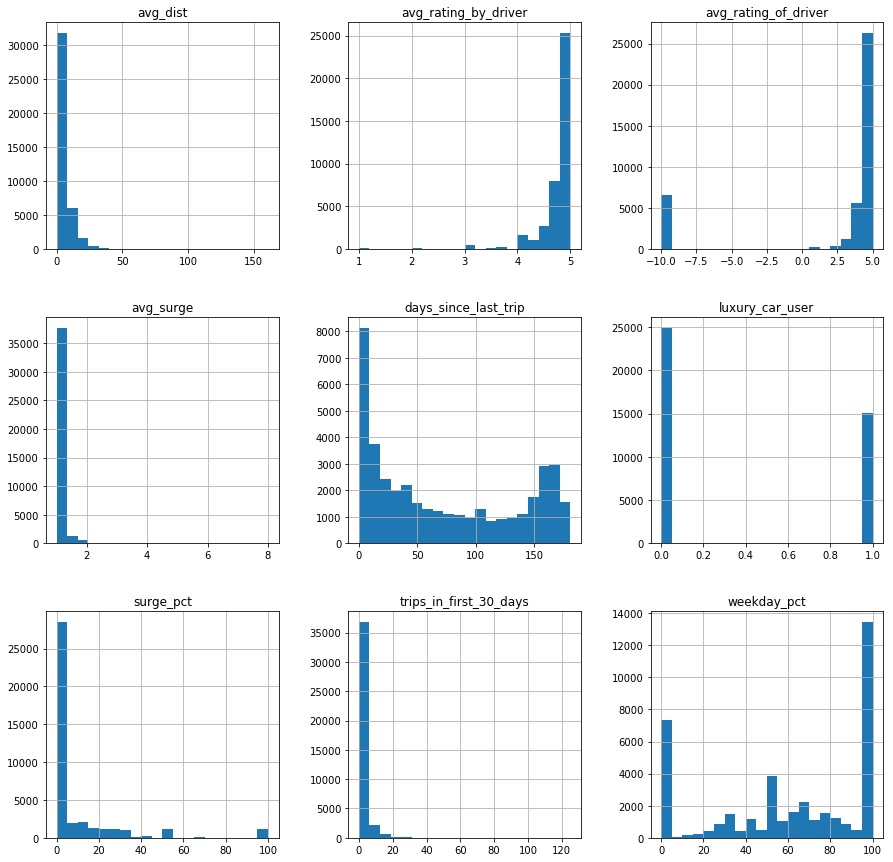

In [138]:
df.hist(figsize=(15,15), bins=20)

In [139]:
for feature in df.columns:
    print feature, sum(pd.isnull(df[feature]))

avg_dist 0
avg_rating_by_driver 162
avg_rating_of_driver 0
avg_surge 0
city 0
last_trip_date 0
phone 319
signup_date 0
surge_pct 0
trips_in_first_30_days 0
luxury_car_user 0
weekday_pct 0
days_since_last_trip 0
churned 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130aff3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x132571350>]], dtype=object)

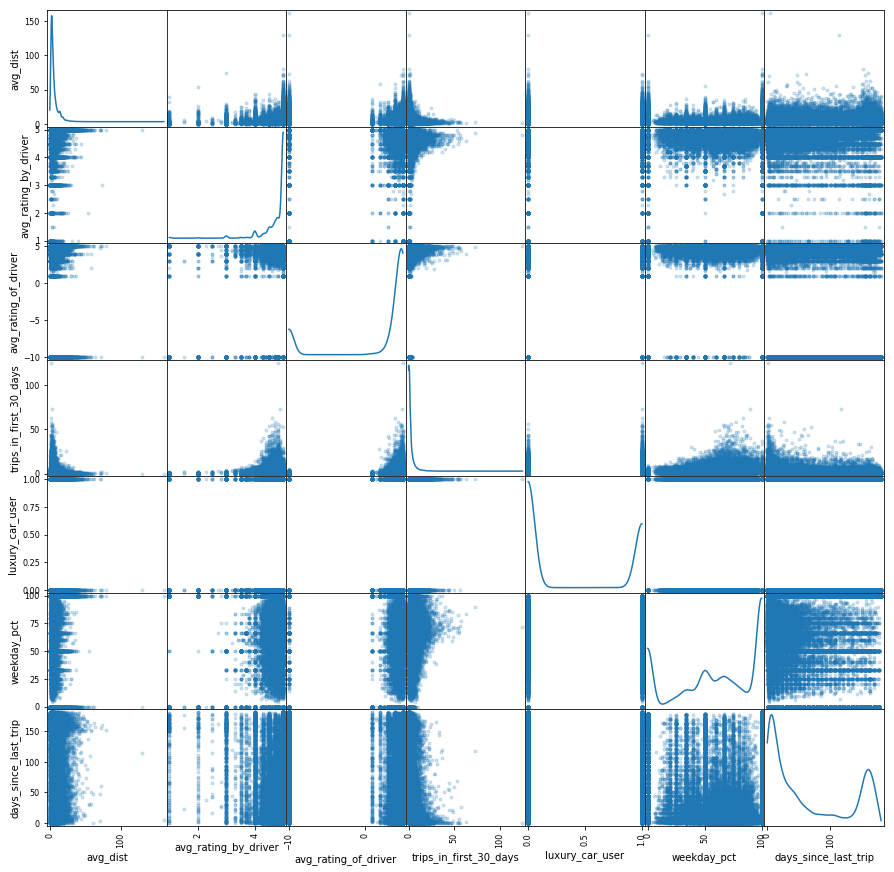

In [140]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'phone', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'days_since_last_trip']], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [141]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,days_since_last_trip
avg_dist,1.000000,0.082303,-0.125125,-0.079488,-0.102349,-0.135228,0.025824,0.097445,0.108265
avg_rating_by_driver,0.082303,1.000000,0.003795,0.007859,0.018849,-0.039282,0.010300,0.021552,0.033876
avg_rating_of_driver,-0.125125,0.003795,1.000000,-0.011490,0.002686,0.192939,0.035380,0.024350,-0.179097
avg_surge,-0.079488,0.007859,-0.011490,1.000000,0.793842,-0.001829,-0.075544,-0.113054,0.018455
surge_pct,-0.102349,0.018849,0.002686,0.793842,1.000000,0.004746,-0.103531,-0.147969,-0.002873
trips_in_first_30_days,-0.135228,-0.039282,0.192939,-0.001829,0.004746,1.000000,0.114741,0.049731,-0.167532
luxury_car_user,0.025824,0.010300,0.035380,-0.075544,-0.103531,0.114741,1.000000,0.033478,-0.168669
weekday_pct,0.097445,0.021552,0.024350,-0.113054,-0.147969,0.049731,0.033478,1.000000,-0.021216
days_since_last_trip,0.108265,0.033876,-0.179097,0.018455,-0.002873,-0.167532,-0.168669,-0.021216,1.000000


In [142]:
df = pd.get_dummies(df, columns=['city', 'phone'])

In [143]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'last_trip_date', u'signup_date', u'surge_pct',
       u'trips_in_first_30_days', u'luxury_car_user', u'weekday_pct',
       u'days_since_last_trip', u'churned', u'city_Astapor',
       u'city_King's Landing', u'city_Winterfell', u'phone_Android',
       u'phone_iPhone'],
      dtype='object')